
# 🎬 PROJET 16 : PRÉDICTION DU BOX-OFFICE 🍿

Bienvenue dans ce projet de Data Science ! 
Aujourd'hui, vous êtes analyste pour un grand studio de cinéma. 
Votre mission : **Prédire combien un film va rapporter (Revenus) AVANT même qu'il ne sorte !** 💰

Nous allons utiliser des données historiques (Budget, Genre, Acteurs...) pour construire un modèle d'Intelligence Artificielle.

---

## 📅 VOTRE PROGRAMME

### 📋 SESSION 1 : From Raw Data to Clean Insights (45 min)
- **Part 1: The Setup** - Chargement et découverte des données
- **Part 2: The Sanity Check** - Nettoyage (films sans genre, budgets bizarres)
- **Part 3: Exploratory Data Analysis** - Quel genre rapporte le plus ?

### 📋 SESSION 2 : The Art of Feature Engineering (45 min)
- **Part 1: The Concept** - Transformer des dates et du texte en nombres
- **Part 2: The Lab** - Créer des variables "Mois de sortie" et "Saison"
- **Part 3: Final Prep** - Préparer les données pour l'IA

### 📋 SESSION 3 : Building & Trusting Your Model (45 min)
- **Part 1: The Split** - Séparer l'entraînement et le test
- **Part 2: Training** - Entraîner notre "Cerveau" (Random Forest)
- **Part 3: Evaluation** - Est-ce que notre modèle est fiable ?
- **Part 4: Going Further (BONUS)** - Analyser la rentabilité (ROI)

---



# 📋 SESSION 1 : FROM RAW DATA TO CLEAN INSIGHTS



## 🏁 Part 1: The Setup (10 min)

Commençons par importer nos outils (les librairies Python) et charger les données.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour que les graphiques soient jolis
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Librairies importées avec succès !")


✅ Librairies importées avec succès !



### 📂 Chargement des données
Le fichier s'appelle `box_office.csv`.


In [2]:

# Chargement du dataset
df = pd.read_csv('box_office.csv')

# Afficher les 5 premières lignes
print("Aperçu des données :")
display(df.head())

# Afficher les infos techniques
print("\nInfos techniques :")
df.info()


Aperçu des données :


,ID_Film,Budget,Genre,Score_Acteurs,Date_Sortie,Revenus
0,1,7258737.70,Horror,5.7,2007-03-30,16440000.0
1,2,1983403.44,Action,8.8,2003-12-06,7170000.0
2,3,5330625.11,Sci-Fi,8.5,2015-12-12,24630000.0
3,4,11229835.42,Comedy,0.2,2002-05-11,6520000.0
4,5,9546626.59,NaN,7.2,2015-12-15,53710000.0



Infos techniques :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Film        800 non-null    int64  
 1   Budget         800 non-null    float64
 2   Genre          757 non-null    object 
 3   Score_Acteurs  771 non-null    float64
 4   Date_Sortie    800 non-null    object 
 5   Revenus        800 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 37.6+ KB



## 🧹 Part 2: The Sanity Check (15 min)

Les données réelles sont rarement parfaites. Il faut les nettoyer !

### 1. Valeurs manquantes (Nulls)
Regardons si nous avons des trous dans nos données.


In [3]:

# Compter les valeurs manquantes par colonne
print(df.isnull().sum())


ID_Film           0
Budget            0
Genre            43
Score_Acteurs    29
Date_Sortie       0
Revenus           0
dtype: int64



> **💡 Tip:** Si le `Genre` est manquant, on ne peut pas le deviner. Comme il y en a peu, supprimons ces lignes.


In [4]:

# Supprimer les lignes où le Genre est manquant
df = df.dropna(subset=['Genre'])

print(f"✅ Nouvelles dimensions du dataset : {df.shape}")


✅ Nouvelles dimensions du dataset : (757, 6)



### 2. Doublons
Avons-nous des films en double ?


In [5]:

# Vérifier les doublons
doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

# Si doublons > 0, on les supprime
if doublons > 0:
    df = df.drop_duplicates()
    print("✅ Doublons supprimés !")


Nombre de doublons : 0



## 📊 Part 3: Exploratory Data Analysis (20 min)

Jouons aux détectives ! Quelles sont les tendances ?

### 💰 Budget vs Revenus
Est-ce que dépenser plus garantit de gagner plus ?


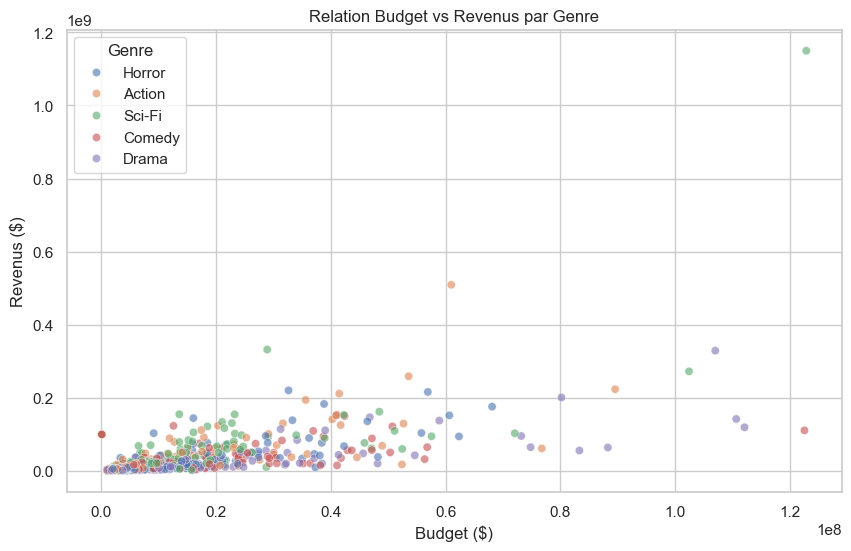

In [6]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Budget', y='Revenus', hue='Genre', alpha=0.6)
plt.title('Relation Budget vs Revenus par Genre')
plt.xlabel('Budget ($)')
plt.ylabel('Revenus ($)')
plt.show()



### 🎭 Revenus par Genre
Quel genre rapporte le plus en moyenne ?


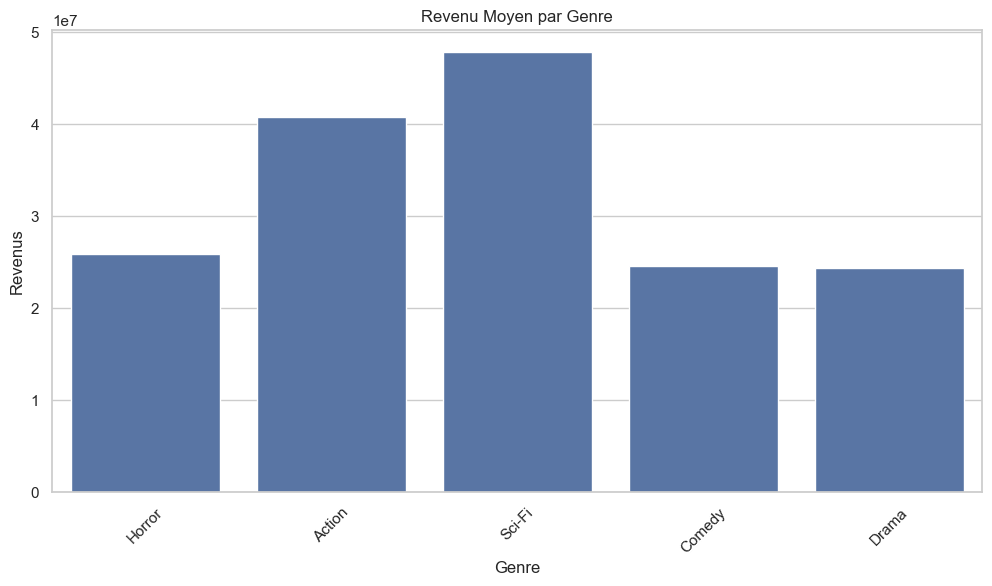

In [7]:

# TODO: Répétez pour le barplot des revenus par genre
# Indice : utilisez sns.barplot(data=df, x='Genre', y='Revenus')
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Genre', y='Revenus', estimator=np.mean, errorbar=None)
plt.title('Revenu Moyen par Genre')
plt.xticks(rotation=45)
plt.show()



❓ **Question :** Quel genre semble être le plus lucratif en moyenne ? Est-ce surprenant ?



# 📋 SESSION 2 : THE ART OF FEATURE ENGINEERING



## 🧠 Part 1: The Concept (10 min)

Les ordinateurs ne comprennent que les chiffres.
- "Action" -> ❌
- "2023-12-25" -> ❌
- 1500000 -> ✅

Nous devons transformer nos données !



## 🧪 Part 2: The Lab - Choose Your Recipe (30 min)

### Recipe 1: Dates & Time 🕐
La `Date_Sortie` contient des infos précieuses : le mois (été vs hiver), l'année, le jour de la semaine.


In [8]:

# Convertir la colonne en format datetime
df['Date_Sortie'] = pd.to_datetime(df['Date_Sortie'])

# Extraire les features
df['Annee'] = df['Date_Sortie'].dt.year
df['Mois'] = df['Date_Sortie'].dt.month
df['JourSemaine'] = df['Date_Sortie'].dt.dayofweek  # 0=Lundi, 6=Dimanche

print("✅ Colonnes temporelles créées !")
display(df[['Date_Sortie', 'Annee', 'Mois', 'JourSemaine']].head())


✅ Colonnes temporelles créées !


,Date_Sortie,Annee,Mois,JourSemaine
0,2007-03-30,2007,3,4
1,2003-12-06,2003,12,5
2,2015-12-12,2015,12,5
3,2002-05-11,2002,5,5
5,2016-06-13,2016,6,0



### Recipe 2: Categories 🏷️
Le `Genre` est une catégorie. Utilisons le **One-Hot Encoding** pour créer une colonne par genre (Genre_Action, Genre_Comedy, etc.).


In [9]:

# One-Hot Encoding pour le Genre
df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

print("✅ Encodage terminé !")
display(df.head())


✅ Encodage terminé !


,ID_Film,Budget,Score_Acteurs,Date_Sortie,Revenus,Annee,Mois,JourSemaine,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Horror,Genre_Sci-Fi
0,1,7258737.70,5.7,2007-03-30,16440000.0,2007,3,4,False,False,False,True,False
1,2,1983403.44,8.8,2003-12-06,7170000.0,2003,12,5,True,False,False,False,False
2,3,5330625.11,8.5,2015-12-12,24630000.0,2015,12,5,False,False,False,False,True
3,4,11229835.42,0.2,2002-05-11,6520000.0,2002,5,5,False,True,False,False,False
5,6,13424420.04,8.3,2016-06-13,36610000.0,2016,6,0,True,False,False,False,False



### Recipe 4: Math Magic ➗
Les budgets et revenus ont des valeurs énormes et très étalées (skewed).
Utilisons le **Logarithme** pour les "tasser" et aider le modèle.


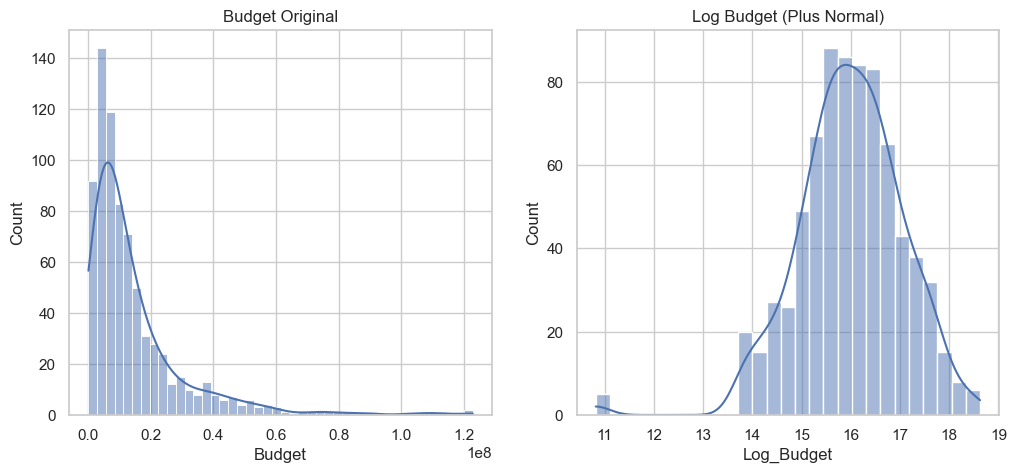

In [10]:

# Appliquer log(x + 1) pour éviter log(0)
df['Log_Budget'] = np.log1p(df['Budget'])

# Visualisons la différence
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Budget'], ax=axes[0], kde=True).set_title('Budget Original')
sns.histplot(df['Log_Budget'], ax=axes[1], kde=True).set_title('Log Budget (Plus Normal)')
plt.show()



## 🏁 Part 3: Final Prep (5 min)

Nettoyons le dataset final pour l'entraînement.
On retire les colonnes inutiles (ID, Date originale, etc.).


In [11]:

# Colonnes à supprimer
cols_to_drop = ['ID_Film', 'Date_Sortie', 'Budget'] # On garde Log_Budget

df_model = df.drop(columns=cols_to_drop)

print(f"✅ Prêt pour le modèle ! Dimensions : {df_model.shape}")


✅ Prêt pour le modèle ! Dimensions : (757, 11)



# 📋 SESSION 3 : BUILDING & TRUSTING YOUR MODEL



## ✂️ Part 1: The Split (10 min)

On sépare les données :
- **X** : Les indices (Log_Budget, Score_Acteurs, Annee, Mois, Genres...)
- **y** : La cible (Revenus)


In [12]:

from sklearn.model_selection import train_test_split

X = df_model.drop('Revenus', axis=1)
y = df_model['Revenus']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")


Train size: (605, 10)
Test size: (152, 10)



## 🏋️ Part 2: Training (15 min)

Nous allons utiliser un **RandomForestRegressor**. C'est un ensemble d'arbres de décision qui votent pour prédire le revenu.


In [13]:

from sklearn.ensemble import RandomForestRegressor

# Création du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement
print("⏳ Entraînement en cours...")
model.fit(X_train, y_train)
print("✅ Modèle entraîné !")


⏳ Entraînement en cours...
✅ Modèle entraîné !



## 🎯 Part 3: Evaluation (20 min)

Notre modèle est-il bon ? Regardons les métriques :
- **MAE (Mean Absolute Error)** : Erreur moyenne en $
- **R² Score** : Précision globale (1.0 = Parfait)


💰 Erreur Moyenne (MAE) : $16,448,735.53
📊 Score R² : 0.462


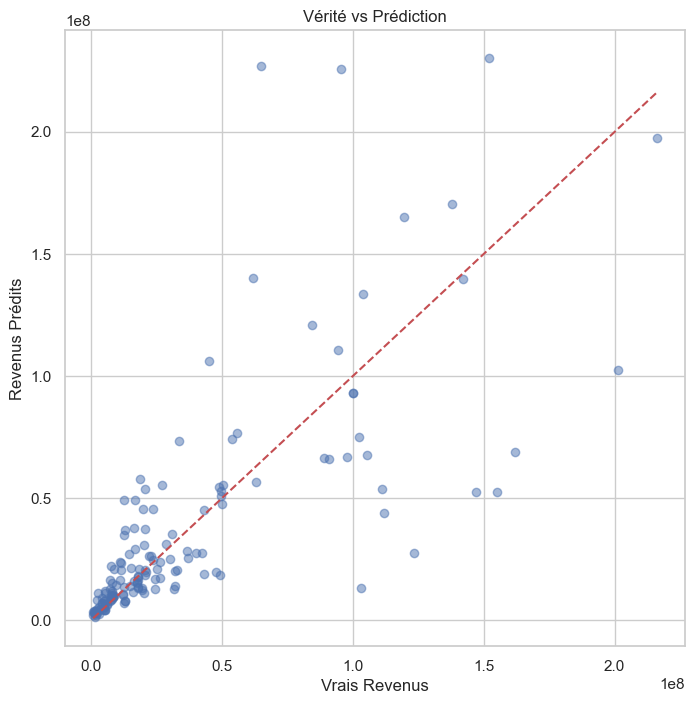

In [14]:

from sklearn.metrics import mean_absolute_error, r2_score

# Prédictions
y_pred = model.predict(X_test)

# Métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"💰 Erreur Moyenne (MAE) : ${mae:,.2f}")
print(f"📊 Score R² : {r2:.3f}")

# Comparaison visuelle
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Ligne parfaite
plt.xlabel('Vrais Revenus')
plt.ylabel('Revenus Prédits')
plt.title('Vérité vs Prédiction')
plt.show()



## 🎁 Part 4: Going Further (Bonus - 15-30 mins)

Le modèle est prêt ! Explorons des questions business plus poussées.

### Bonus Task 1: Analyse du ROI (Return on Investment) 💸
**Goal:** Identifier les films rentables.
**Formula:** `ROI = Revenus / Budget`

- ROI < 1 : Flop (Perte d'argent)
- ROI > 1 : Succès
- ROI > 3 : Blockbuster !


Performance
Succès 👍         429
Flop 📉           176
Blockbuster 🚀    152
Name: count, dtype: int64


C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mehdi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


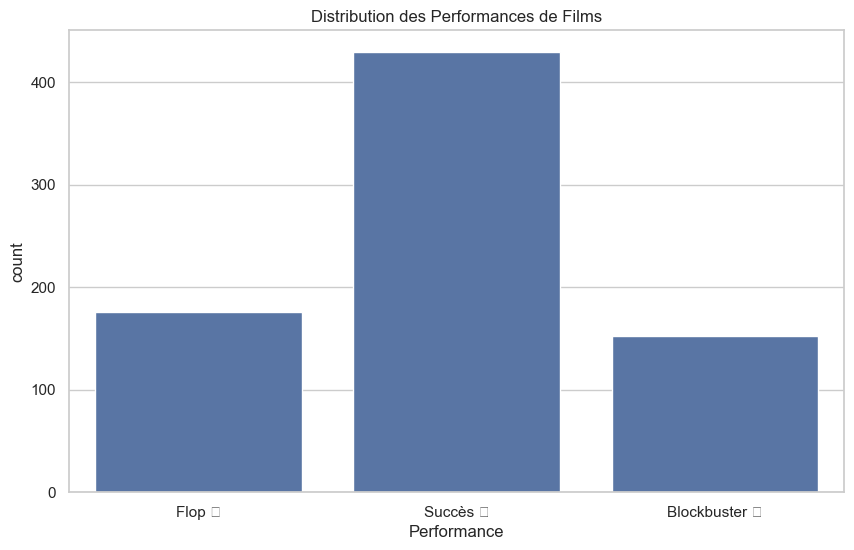

In [15]:

# Calcul du ROI sur tout le dataset original (df)
df['ROI'] = df['Revenus'] / df['Budget']

# Création des catégories
def categorize_roi(roi):
    if roi < 1:
        return 'Flop 📉'
    elif roi < 3:
        return 'Succès 👍'
    else:
        return 'Blockbuster 🚀'

df['Performance'] = df['ROI'].apply(categorize_roi)

# Visualisation
print(df['Performance'].value_counts())
sns.countplot(data=df, x='Performance', order=['Flop 📉', 'Succès 👍', 'Blockbuster 🚀'])
plt.title('Distribution des Performances de Films')
plt.show()



### Bonus Task 2: Le Mois de Sortie Optimal 🗓️
**Goal:** Quel mois choisir pour sortir un film et maximiser les revenus ?


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_15568\951467465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rev, x='Mois', y='Revenus', palette='viridis')


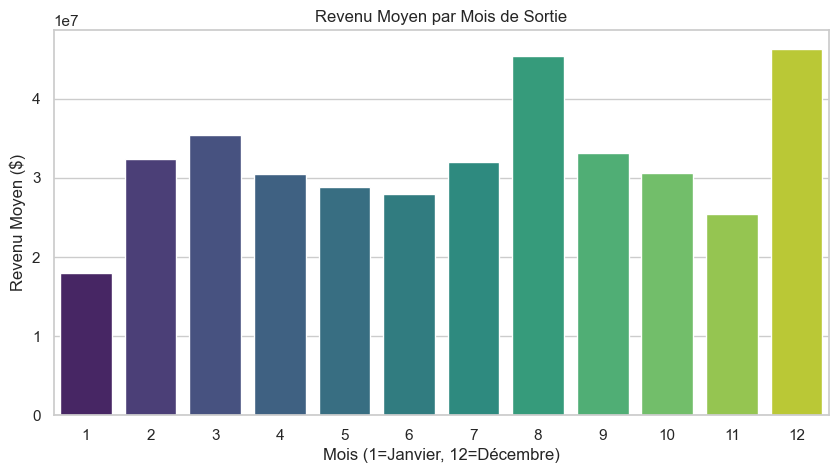

In [16]:

# Revenu moyen par mois
monthly_rev = df.groupby('Mois')['Revenus'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_rev, x='Mois', y='Revenus', palette='viridis')
plt.title('Revenu Moyen par Mois de Sortie')
plt.xlabel('Mois (1=Janvier, 12=Décembre)')
plt.ylabel('Revenu Moyen ($)')
plt.show()



❓ **Question Business :** Si vous deviez sortir un gros film d'action, quel mois choisiriez-vous ? (Regardez les pics !)
